#Computer Vision Midterm Assignment
## Introduction
Welcome to your Computer Vision midterm project! Here, you'll get hands-on experience building an image recognition model using Convolutional Neural Networks and transfer learning.


##Install Necessary Libraries:

In [1]:
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install matplotlib

In [4]:
# ==================================================
# Install Necessary Libraries (opcional si tu entorno ya las tiene)
# ==================================================
!pip install tensorflow
!pip install numpy
!pip install matplotlib

# ==================================================
# Imports
# ==================================================
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Reemplazamos 'keras' por 'tensorflow.keras'
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

# (Opcional) Si deseas usar un modelo pre-entrenado
from tensorflow.keras.applications import MobileNetV2

# ==================================================
# Additional libraries for data loading
# (if using a custom dataset)
# ==================================================
import os
import zipfile

# ==================================================
# Ejemplo de verificación de versión de TensorFlow
# ==================================================
print("TensorFlow version:", tf.__version__)

# ==================================================
# A partir de aquí, iría tu código para cargar datos,
# entrenar el modelo, etc.
# ==================================================


TensorFlow version: 2.18.0


**Dataset Selection and Loading**

* **Choose Your Dataset**
   * **Standard Datasets:** CIFAR-10, CIFAR-100, or a suitable subset of ImageNet are good starting points. You can use built-in functions to load them.
   * **Custom Dataset:** If you propose a custom dataset, ensure it has sufficient images per class, good quality, and accurate labeling. You'll need to upload it to Colab.
   * **Select your dataset and uncomment the appropriate loading code.**
   * **If you are using a custom dataset, make sure you have uploaded it to Colab and adjust the file path.**

In [ ]:
# select your dataset
# from keras.datasets import cifar10 # Or cifar100, or a suitable ImageNet loader


# *** Dataset Loading - Uncomment the lines for your chosen dataset ***

# Option 1: CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Option 2: CIFAR-100
# (x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Option 3: Custom Dataset
# x_train, y_train = load_custom_data('path/to/your/training/data')
# x_test, y_test = load_custom_data('path/to/your/testing/data')

In [5]:
# =========================================
# 1) Cargar CIFAR-10
# =========================================
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# =========================================
# 2) Normalizar los datos
# =========================================
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

print("Data normalization done!")

# (Opcional) Convertir etiquetas a one-hot encoding para clasificación
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

print("Dataset loaded and ready for training!")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Data normalization done!
Dataset loaded and ready for training!


**Markdown Cell: Exploratory Data Analysis (EDA)**

* **Instructions:**
    * Visualize a few random images from your dataset to understand its content and overall quality.
    * Check the shape of your data to confirm the number of images and their dimensions.

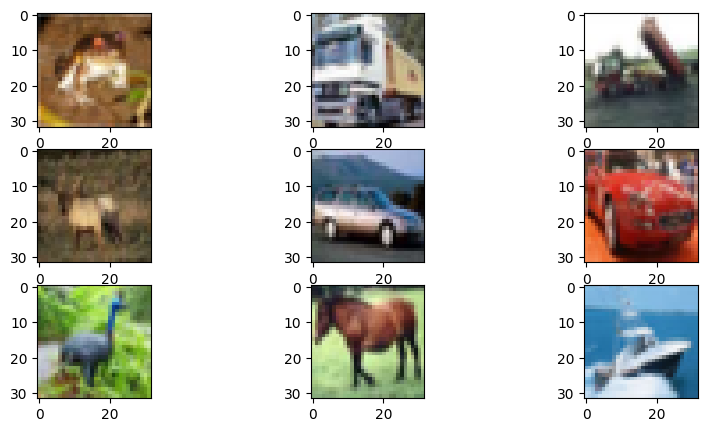

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)
Class Distribution (Top 10):
[(np.int64(6), 5000), (np.int64(9), 5000), (np.int64(4), 5000), (np.int64(1), 5000), (np.int64(2), 5000), (np.int64(7), 5000), (np.int64(8), 5000), (np.int64(3), 5000), (np.int64(5), 5000), (np.int64(0), 5000)]


In [6]:
# Insert codode here
# Insert code here to display a few sample images from the dataset
## Display sample images
plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
plt.show()
#
print('Training data shape:', x_train.shape)
print('Training labels shape:', y_train.shape)
print('Test data shape:', x_test.shape)
print('Test labels shape:', y_test.shape)

# Explore class distribution (if using a standard dataset)
from collections import Counter
print('Class Distribution (Top 10):')
print(Counter(np.argmax(y_train, axis=1)).most_common(10))

**Image Preprocessing**

* **Instructions:**
    1. **Normalization:**
       * Normalize pixel values (usually to the range of 0-1 or -1 to 1)  
    2. **Resizing:**
       * Resize images to a consistent size for model input.

In [30]:
# Insert code here to normalize images
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Resize images if needed (adjust input_shape in model building accordingly)
# x_train = tf.image.resize(x_train, (224, 224))  # Example for resizing to 224x224
# x_test = tf.image.resize(x_test, (224, 224))

# Insert code here to resize images, if needed

# ** Data Augmentation **

* **Instructions:**

1. Experiment with Parameters:  The code below has some example data augmentation parameters. Try changing the values within these parameters, or even adding new augmentation techniques! Here's a short guide:

* Hint 1: Start with small adjustments to see the effects clearly.
* Hint 2: Consider which augmentations make sense for your dataset. Flipping images of letters might be okay, but rotating them too much could make them unreadable!

* Explore more: Try adding things like shear_range (for shearing transformations) or zoom_range (for random zooming).

2. Visualize the Effects: After setting up your ImageDataGenerator, add a few lines of code to display some randomly augmented images from your dataset. This will help you see how your chosen parameters change the images.
* Hint: Use a small sample of images so it's easy to compare the originals with the augmented versions.

In [25]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
train_datagen.fit(x_train)


sample_images shape: (5, 32, 32, 3)
sample_images min: 0.0 max: 1.0
augmented_images shape: (5, 32, 32, 3)
augmented_images min: 0.005285518 max: 0.99487185


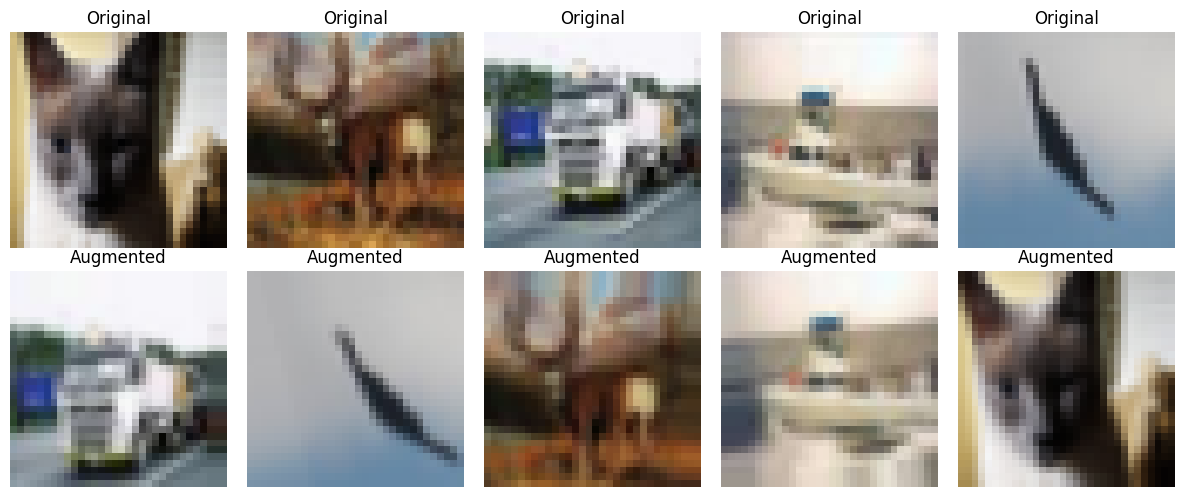

sample_images[0][0][0] = [0.8       0.7176471 0.4862745]
sample_images[0][16][16] = [0.00392157 0.00392157 0.00784314]


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation with example parameters
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Make sure to call fit() if using featurewise stats
train_datagen.fit(x_train)

# Select 5 random images from the training set
num_samples = 5
indices = np.random.choice(len(x_train), num_samples)
sample_images = x_train[indices] # Define sample_images here

# Generate a batch with augmentations
augmented_images = next(train_datagen.flow(sample_images, batch_size=num_samples))

# Check if they have the expected shape and values
print("sample_images shape:", sample_images.shape)
print("sample_images min:", sample_images.min(), "max:", sample_images.max())
print("augmented_images shape:", augmented_images.shape)
print("augmented_images min:", augmented_images.min(), "max:", augmented_images.max())

# Visualize in 2 rows: row 1 (original), row 2 (augmented)
fig, axs = plt.subplots(2, num_samples, figsize=(12, 5))
for i in range(num_samples):
    axs[0, i].imshow(sample_images[i])
    axs[0, i].axis('off')
    axs[0, i].set_title("Original")

    axs[1, i].imshow(augmented_images[i])
    axs[1, i].axis('off')  # Turn off axes for the augmented images
    axs[1, i].set_title("Augmented")

plt.tight_layout()
plt.show()


print("sample_images[0][0][0] =", sample_images[0][0][0])
print("sample_images[0][16][16] =", sample_images[0][16][16])


#Model Building (Transfer Learning)

In [13]:
# ==========================================
# Imports
# ==========================================
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Si usarás preprocesamiento especial de VGG16:
from tensorflow.keras.applications.vgg16 import preprocess_input


In [14]:
# Número de clases de CIFAR-10 (o las que tengas en tu dataset)
num_classes = 10

# Cargamos la base de VGG16 con pesos de ImageNet, sin la parte fully-connected
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelamos todas las capas del modelo base para no reentrenarlas
for layer in base_model.layers:
    layer.trainable = False

# Añadimos nuestras capas "top"
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # opcional, para regularizar
predictions = Dense(num_classes, activation='softmax')(x)

# Construimos el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilamos
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,140,042 (80.64 MB)

 Trainable params: 6,425,354 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

# Model Training




In [1]:
# ==========================================
# 1) IMPORTS
# ==========================================
import numpy as np
import cv2
import tensorflow as tf

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

print("TensorFlow version:", tf.__version__)

# ==========================================
# 2) CARGAR CIFAR-10 Y REDUCIRLO
# ==========================================
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Tomamos un subconjunto para ahorrar RAM
# e.g. 5k de train y 1k de test
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test  = x_test[:1000]
y_test  = y_test[:1000]

print("x_train shape (subsample):", x_train.shape)
print("y_train shape (subsample):", y_train.shape)
print("x_test shape (subsample):", x_test.shape)
print("y_test shape (subsample):", y_test.shape)

# Convertimos a float
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

# One-hot para las etiquetas
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test, num_classes)

# ==========================================
# 3) REDIMENSIONAR A (64, 64)
# ==========================================
def resize_images(images, size=(64,64)):
    resized = []
    for img in images:
        r_img = cv2.resize(img, size)
        resized.append(r_img)
    return np.array(resized)

x_train_resized = resize_images(x_train, (64,64))
x_test_resized  = resize_images(x_test, (64,64))

print("x_train_resized shape:", x_train_resized.shape)
print("x_test_resized shape:", x_test_resized.shape)

# ==========================================
# 4) PREPROCESAR PARA MobileNetV2
# ==========================================
x_train_resized = preprocess_input(x_train_resized)
x_test_resized  = preprocess_input(x_test_resized)

# ==========================================
# 5) DEFINIR MobileNetV2 con alpha reducido
# ==========================================
# alpha < 1.0 => modelo más ligero
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(64,64,3),
    alpha=0.35  # reduce el número de filtros, ahorrando RAM
)

for layer in base_model.layers:
    layer.trainable = False

# Añadimos capas densas
from tensorflow.keras.layers import GlobalAveragePooling2D
x = GlobalAveragePooling2D()(base_model.output)  # en vez de Flatten para menor RAM
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
preds = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=preds)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

# ==========================================
# 6) ENTRENAMIENTO
# ==========================================
epochs = 3
batch_size = 16

history = model.fit(
    x_train_resized, y_train,
    validation_data=(x_test_resized, y_test),
    epochs=epochs,
    batch_size=batch_size
)

# ==========================================
# 7) EVALUACIÓN
# ==========================================
loss, acc = model.evaluate(x_test_resized, y_test, batch_size=batch_size)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")


TensorFlow version: 2.18.0
x_train shape (subsample): (5000, 32, 32, 3)
y_train shape (subsample): (5000, 1)
x_test shape (subsample): (1000, 32, 32, 3)
y_test shape (subsample): (1000, 1)
x_train_resized shape: (5000, 64, 64, 3)
x_test_resized shape: (1000, 64, 64, 3)


<ipython-input-1-dda9a5968ef7>:69: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


2019640/2019640 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 64, 64, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 32, 32, 16)     │            432 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 32, 32, 16)     │             64 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 32, 32, 16)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 32, 32, 16)     │            144 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 32, 32, 16)     │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 32, 32, 16)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 32, 32, 8)      │            128 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 32, 32, 8)      │             32 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 32, 32, 48)     │            384 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 32, 32, 48)     │            192 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 32, 32, 48)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 33, 33, 48)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 16, 16, 48)     │            432 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 492,842 (1.88 MB)

 Trainable params: 82,634 (322.79 KB)

 Non-trainable params: 410,208 (1.56 MB)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.3115 - loss: 2.0525 - val_accuracy: 0.5670 - val_loss: 1.2514
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.5328 - loss: 1.3404 - val_accuracy: 0.5920 - val_loss: 1.1696
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.5882 - loss: 1.1718 - val_accuracy: 0.6000 - val_loss: 1.1264
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6074 - loss: 1.0982

Test Loss: 1.1264
Test Accuracy: 0.6000


#Enhanced Training

Implement data augmentation within the training loop.
Add callbacks to monitor progress and save the best performing model.
Modify the Training Code: If you haven't already, we need to make a few changes to your training loop:

1.   Integrate the Data Augmentation: Replace the
direct use of x_train with datagen.flow(x_train, y_train, batch_size=32). This will apply your augmentations in real-time during training
2.   Use the Validation Set: We already have validation_data=(x_test, y_test).
3. Save the Best Model: We're using a ModelCheckpoint callback to automatically save the model if its performance on the validation set improves
* Hint: Experiment with different batch sizes as well.

In [7]:
!pip install matplotlib-venn

In [8]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [9]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 126209 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.3_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.3) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.3) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.5 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31631 sha256=8d665a3fc0fbe095653f03d469697a1977476541adaac2bfb51c3313852f5616
  Stored in directory: /root/.cache/pip/wheels/32/98/bd/4893d6923dd027f455b250367d402bfd69a6f4416581df46db
Successfully built libarchive


In [10]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 27.2 MB/s eta 0:00:00


In [13]:
# =============================================
# 1) IMPORTS
# =============================================
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

print("TensorFlow version:", tf.__version__)

# =============================================
# 2) CARGAR CIFAR-10 Y REDUCIRLO
# (para no agotar RAM en Colab Free)
# =============================================
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Subconjunto pequeño para evitar out-of-RAM
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test  = x_test[:1000]
y_test  = y_test[:1000]

print("x_train shape (subsample):", x_train.shape)
print("y_train shape (subsample):", y_train.shape)
print("x_test shape (subsample):", x_test.shape)
print("y_test shape (subsample):", y_test.shape)

# Convertir a float
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

# One-hot para las etiquetas
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test, num_classes)

# =============================================
# 3) REDIMENSIONAR A (64, 64)
# =============================================
def resize_images(images, size=(64,64)):
    resized = []
    for img in images:
        r_img = cv2.resize(img, size)
        resized.append(r_img)
    return np.array(resized)

x_train_resized = resize_images(x_train, (64,64))
x_test_resized  = resize_images(x_test, (64,64))

print("x_train_resized shape:", x_train_resized.shape)
print("x_test_resized shape:", x_test_resized.shape)

# =============================================
# 4) PREPROCESAR (MobileNetV2)
# =============================================
x_train_resized = preprocess_input(x_train_resized)
x_test_resized  = preprocess_input(x_test_resized)

# =============================================
# 5) DEFINIR MODELO MobileNetV2 (alpha reducido)
# =============================================
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(64,64,3),
    alpha=0.35  # Para que sea más ligero
)

for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
preds = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=preds)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

# =============================================
# 6) DATA AUGMENTATION
# =============================================
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
train_datagen.fit(x_train_resized)

# Para validación sin augmentations
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(x_train_resized, y_train, batch_size=16)
val_generator   = val_datagen.flow(x_test_resized, y_test, batch_size=16)

# =============================================
# 7) CALLBACK: ModelCheckpoint
# =============================================
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# =============================================
# 8) ENTRENAMIENTO
# =============================================
epochs = 3

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[checkpoint]
)

# =============================================
# 9) EVALUACIÓN
# =============================================
model.load_weights('best_model.h5')
loss, acc = model.evaluate(val_generator)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")


TensorFlow version: 2.18.0
x_train shape (subsample): (5000, 32, 32, 3)
y_train shape (subsample): (5000, 1)
x_test shape (subsample): (1000, 32, 32, 3)
y_test shape (subsample): (1000, 1)
x_train_resized shape: (5000, 64, 64, 3)
x_test_resized shape: (1000, 64, 64, 3)


<ipython-input-13-c0830d430c7a>:69: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 64, 64, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 32, 32, 16)     │            432 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 32, 32, 16)     │             64 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 32, 32, 16)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 32, 32, 16)     │            144 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 32, 32, 16)     │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 32, 32, 16)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 32, 32, 8)      │            128 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 32, 32, 8)      │             32 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 32, 32, 48)     │            384 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 32, 32, 48)     │            192 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 32, 32, 48)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 33, 33, 48)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 16, 16, 48)     │            432 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 492,842 (1.88 MB)

 Trainable params: 82,634 (322.79 KB)

 Non-trainable params: 410,208 (1.56 MB)

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2441 - loss: 2.2813
Epoch 1: val_loss improved from inf to 1.37281, saving model to best_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.2443 - loss: 2.2802 - val_accuracy: 0.5130 - val_loss: 1.3728
Epoch 2/3
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4026 - loss: 1.6444
Epoch 2: val_loss improved from 1.37281 to 1.27297, saving model to best_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.4026 - loss: 1.6444 - val_accuracy: 0.5430 - val_loss: 1.2730
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4538 - loss: 1.5331
Epoch 3: val_loss improved from 1.27297 to 1.21649, saving model to best_model.h5


313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.4538 - loss: 1.5331 - val_accuracy: 0.5770 - val_loss: 1.2165
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5849 - loss: 1.1847

Test Loss: 1.2165
Test Accuracy: 0.5770


#Visualizing Training Progress

Importance of Monitoring: Explain why tracking validation metrics helps identify overfitting or underfitting.

*   Plot training and validation accuracy/loss curves.


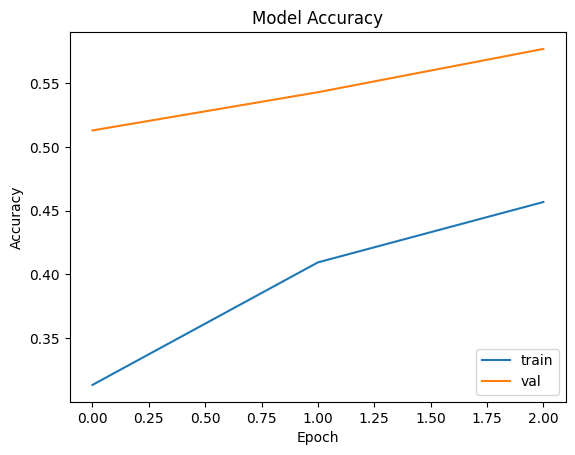

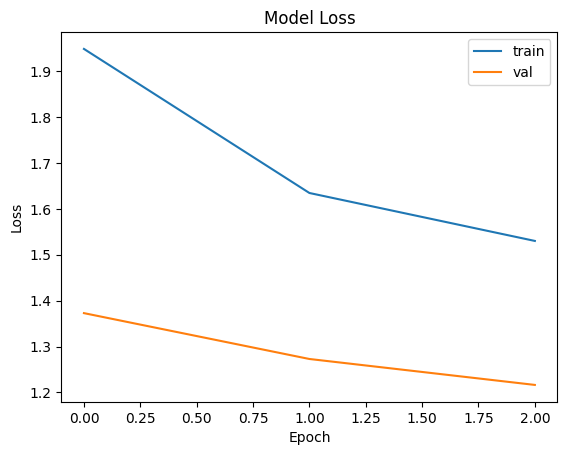

In [14]:
# Plot training and validation curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


#Evaluation on the Test Set

Discuss how test set metrics provide the most unbiased assessment of model performance.

In [20]:
# Después de cargar pesos o cargar el modelo:
model.load_weights('best_model.h5')  # o load_model('best_model.h5')

# Debes usar x_test_resized (64x64) en vez de x_test (32x32)
test_loss, test_acc = model.evaluate(x_test_resized, y_test, batch_size=32)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.5838 - loss: 1.2221
Test Loss: 1.2164872884750366
Test Accuracy: 0.5770000219345093


In [22]:
best_model = load_model('best_model.h5')
test_loss, test_acc = best_model.evaluate(x_test_resized, y_test)


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.5838 - loss: 1.2221


#Hyperparameter Tuning

>Exploring Learning Rates: In the provided code, we're iterating through different learning rates.
* Hint 1: A good starting range for the learning rate is often between 0.01 and 0.0001.
* Hint 2: Pay close attention to how quickly the validation loss starts to increase (if it does), which might signal a learning rate that's too high.



In [16]:
def create_model(learning_rate=0.01):
    # ... (Code to build your model, using the learning_rate parameter)
    return model

# Basic parameter exploration
for lr in [0.01, 0.001, 0.0001]:
    model = create_model(learning_rate=lr)
    # ... (Training the model)


#Confusion Matrx

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step


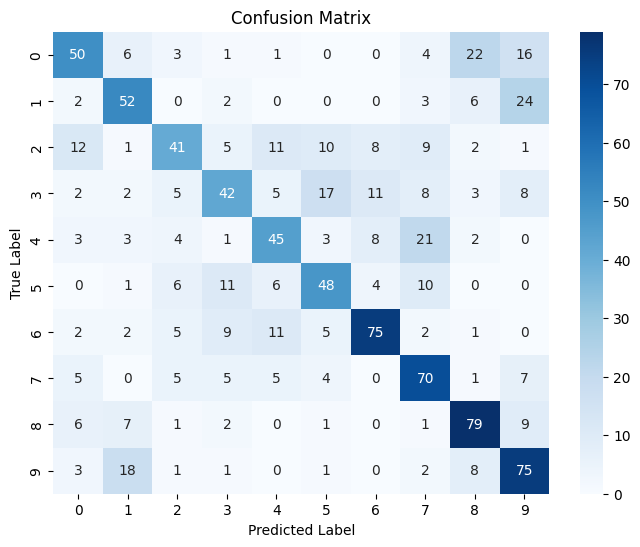

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import numpy as np # Make sure numpy is imported
import matplotlib.pyplot as plt # Make sure matplotlib.pyplot is imported

# Assuming 'best_model' and 'x_test_resized' are available in your environment
y_pred = best_model.predict(x_test_resized)  # Use x_test_resized instead of x_test
y_pred_classes = np.argmax(y_pred, axis=1)
# Assuming 'y_test' contains the true labels corresponding to 'x_test_resized'
# y_test might need to be converted to class labels if it's in one-hot encoded format
# e.g., y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)  # Convert y_test to class labels

plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#Discussion and Further Exploration

##Questions to consider:
1. How does the choice of pre-trained model (VGG16, ResNet50, etc.) affect the results?
2. Analyze the confusion matrix: Are errors more common between certain classes? What might explain this?
3. Experiment with different degrees of fine-tuning (freezing more/fewer layers of the pre-trained model).
4. If applicable to your dataset, can you collect more data for classes with higher error rates?
What are other ways to potentially improve accuracy? (e.g., ensembling models, exploring advanced augmentation strategies, class-weighted training)

Sources
towardsdatascience.com/build-your-own-deep-learning-classification-model-in-keras-511f647980d6
stackoverflow.com/questions/69997327/tensorflow-valueerror-input-0-is-incompatible-with-layer-model-expected-shape
www.influxdata.com/blog/time-series-forecasting-with-tensorflow-influxdb/